In [1]:
#Python Libraries 
import pandas as pd #Data Processing and CSV file I/o
import numpy as np #for numeric operations
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#spliting and scaling the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Using GridSearchCV to find the best algorithm for this problem 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#metric
from sklearn.metrics import classification_report, accuracy_score

In [2]:
df = pd.read_csv(r'C:\Users\HP\Desktop\IBM DATA SCIENCE\Data Science Project\diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
#lowering #lowercasing all the column names
df.columns = df.columns.str.lower()

df.columns

In [8]:
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [10]:
#renaming the column name 
df = df.rename(columns={'diabetespedigreefunction': 'diabetes_pedigree_function', \
                                          'bloodpressure': 'blood_pressure', 'skinthickness': 'skin_thickness'})
df.columns

Index(['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin',
       'bmi', 'diabetes_pedigree_function', 'age', 'outcome'],
      dtype='object')

In [11]:
print(f"The Numbers of Rows and Columns in this data set are: \
{df.shape[0]} rows and {df.shape[1]} columns.")

The Numbers of Rows and Columns in this data set are: 768 rows and 9 columns.


In [13]:
#Checking for Data type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pregnancies                 768 non-null    int64  
 1   glucose                     768 non-null    int64  
 2   blood_pressure              768 non-null    int64  
 3   skin_thickness              768 non-null    int64  
 4   insulin                     768 non-null    int64  
 5   bmi                         768 non-null    float64
 6   diabetes_pedigree_function  768 non-null    float64
 7   age                         768 non-null    int64  
 8   outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
blood_pressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin_thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
diabetes_pedigree_function,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


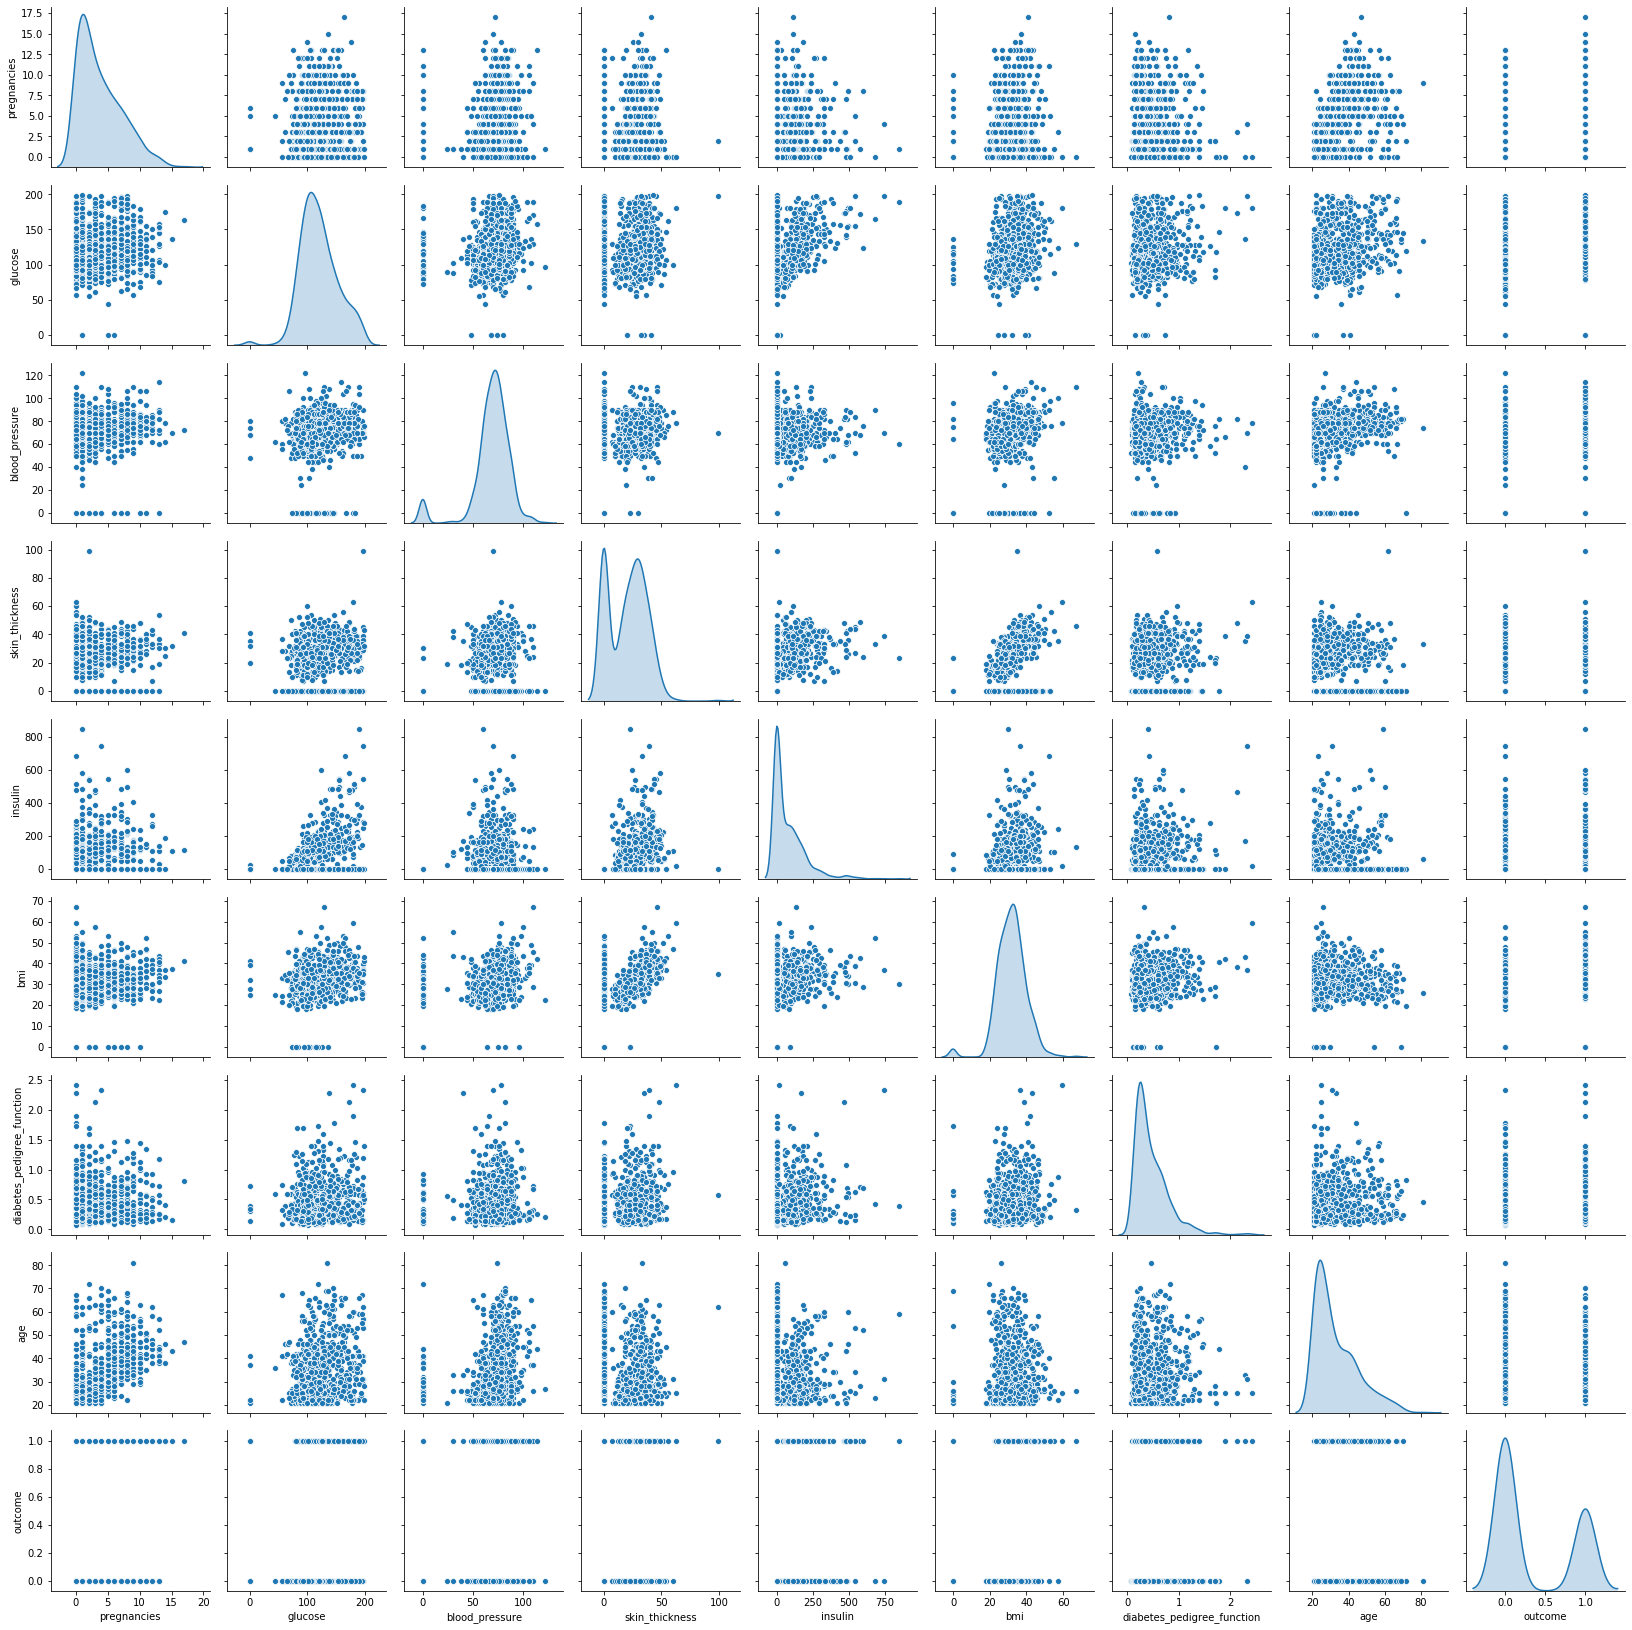

In [15]:
sns.pairplot(df, diag_kind="kde");

In [17]:
#creating correlation matrix
corr = df.corr()

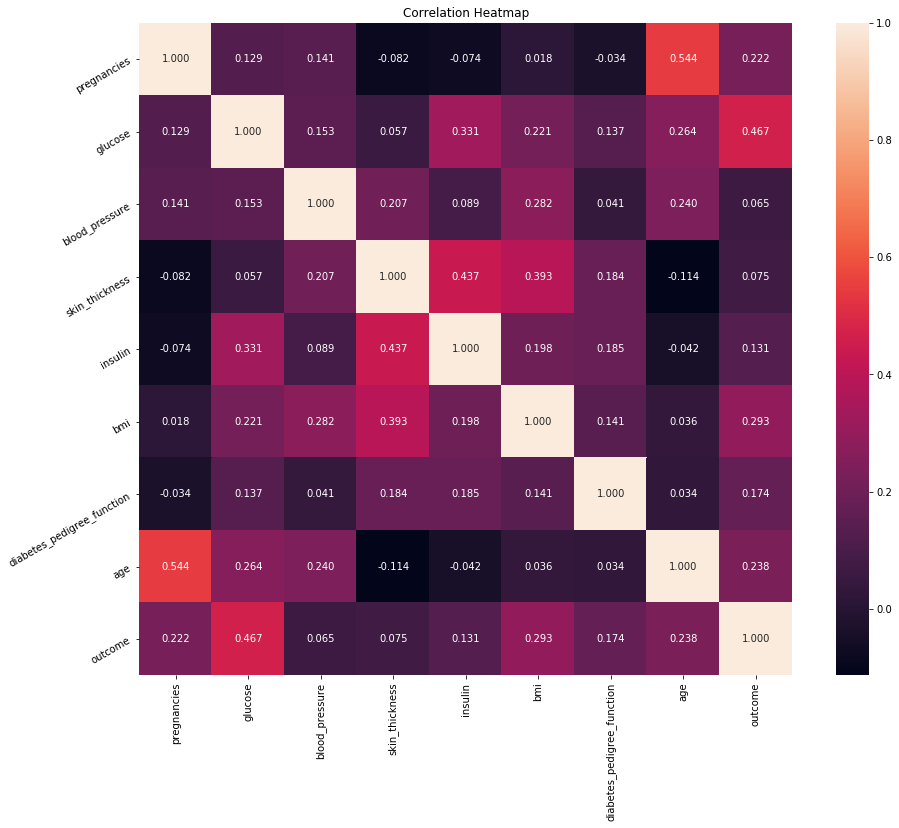

In [18]:
#plotting the correlation matrix
plt.figure(figsize=(16,12))
ax = sns.heatmap(corr, annot=True, square=True, fmt='.3f', linecolor='black')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)
plt.title('Correlation Heatmap')
plt.show();

In [19]:
corr_matrix = df.corr()
corr_matrix['outcome'].sort_values(ascending=False)

outcome                       1.000000
glucose                       0.466581
bmi                           0.292695
age                           0.238356
pregnancies                   0.221898
diabetes_pedigree_function    0.173844
insulin                       0.130548
skin_thickness                0.074752
blood_pressure                0.065068
Name: outcome, dtype: float64

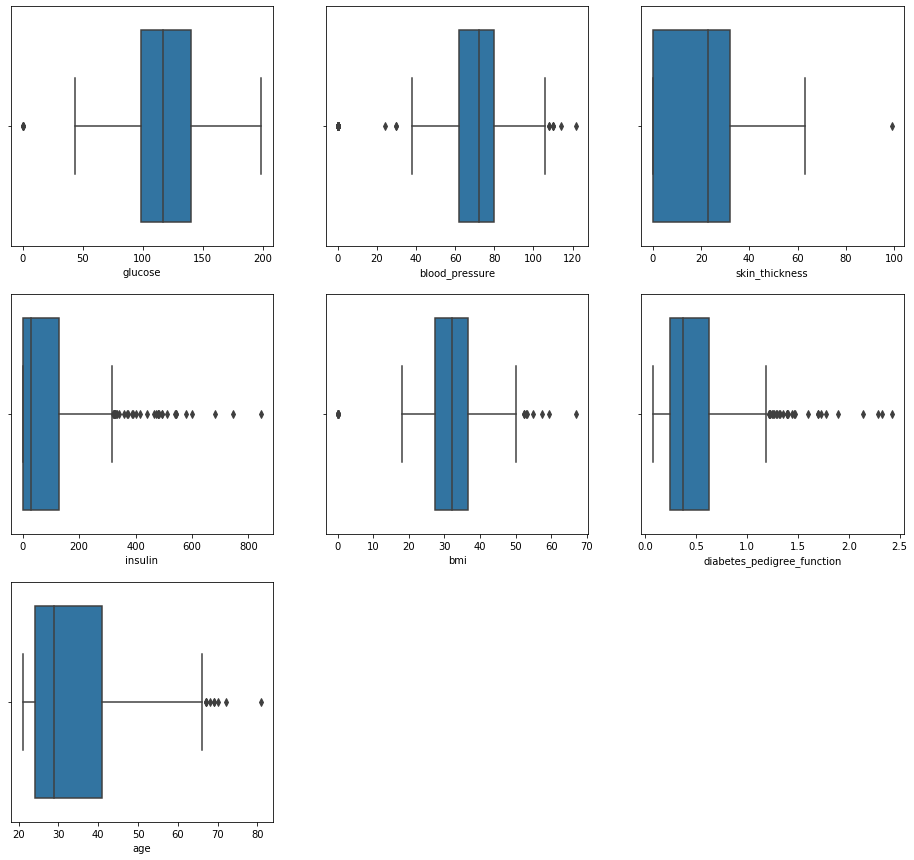

In [20]:
#Checking for outliers
plt.figure(figsize=(16,15)) #(width,height)
plt.subplot(3,3,1) #(row, column, plot_number)
sns.boxplot(x='glucose', data=df);
plt.subplot(3,3,2)
sns.boxplot(x='blood_pressure', data=df);
plt.subplot(3,3,3)
sns.boxplot(x='skin_thickness', data=df);
plt.subplot(3,3,4)
sns.boxplot(x='insulin', data=df);
plt.subplot(3,3,5)
sns.boxplot(x='bmi', data=df);
plt.subplot(3,3,6)
sns.boxplot(x='diabetes_pedigree_function', data=df);
plt.subplot(3,3,7)
sns.boxplot(x='age', data=df);

In [21]:
df.isnull().sum()

pregnancies                   0
glucose                       0
blood_pressure                0
skin_thickness                0
insulin                       0
bmi                           0
diabetes_pedigree_function    0
age                           0
outcome                       0
dtype: int64

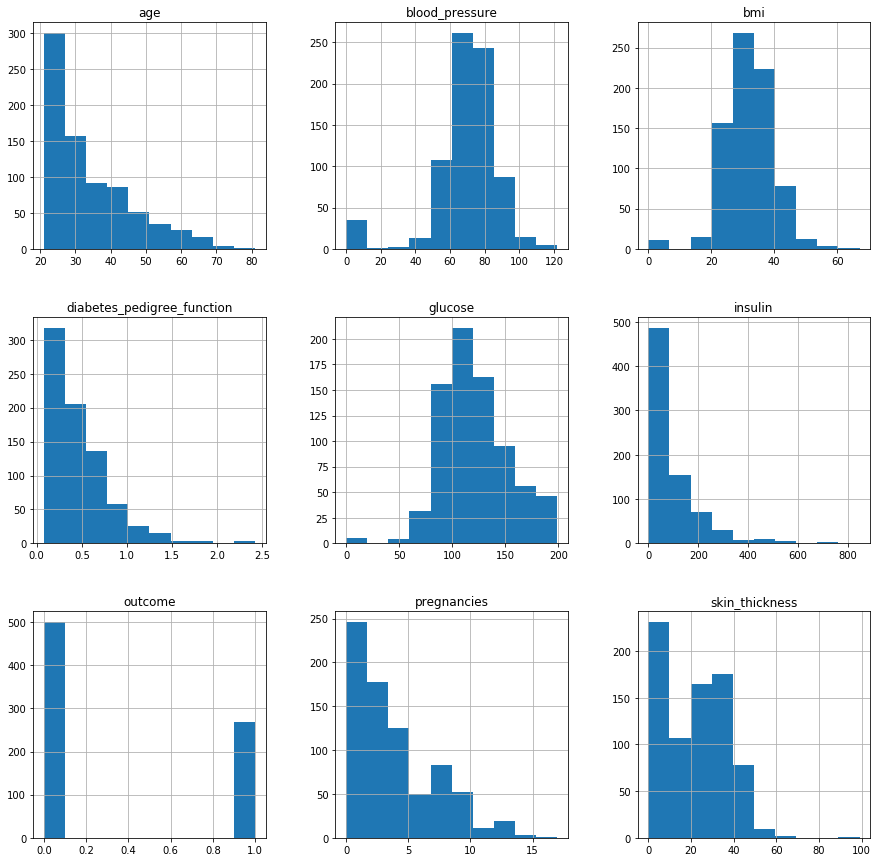

In [22]:
df.hist(figsize=(15,15));

In [23]:
for index in df.columns:
    print(index, '\n', df[index].value_counts().head(2), '\n','-'*30)

pregnancies 
 1    135
0    111
Name: pregnancies, dtype: int64 
 ------------------------------
glucose 
 100    17
99     17
Name: glucose, dtype: int64 
 ------------------------------
blood_pressure 
 70    57
74    52
Name: blood_pressure, dtype: int64 
 ------------------------------
skin_thickness 
 0     227
32     31
Name: skin_thickness, dtype: int64 
 ------------------------------
insulin 
 0      374
105     11
Name: insulin, dtype: int64 
 ------------------------------
bmi 
 32.0    13
31.6    12
Name: bmi, dtype: int64 
 ------------------------------
diabetes_pedigree_function 
 0.254    6
0.258    6
Name: diabetes_pedigree_function, dtype: int64 
 ------------------------------
age 
 22    72
21    63
Name: age, dtype: int64 
 ------------------------------
outcome 
 0    500
1    268
Name: outcome, dtype: int64 
 ------------------------------


In [25]:
X = df.drop(columns='outcome')
y = df['outcome']
#spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [26]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
print(f"In X_train dataset there are: {X_train.shape[0]} rows and {X_train.shape[1]} columns.")
print(f"In X_test dataset there are: {X_test.shape[0]} rows and {X_test.shape[1]} columns.")
print(f"The shape of y_train is: {y_train.shape}")
print(f"The shape of y_test is: {y_test.shape}")

In X_train dataset there are: 614 rows and 8 columns.
In X_test dataset there are: 154 rows and 8 columns.
The shape of y_train is: (614,)
The shape of y_test is: (154,)


In [28]:
X_train[:3]

array([[ 0.90832902,  0.91569367,  0.44912368,  0.52222619,  0.3736349 ,
         0.37852648,  0.67740401,  1.69955804],
       [ 0.03644676, -0.75182191, -0.47230103,  0.14814855, -0.69965674,
        -0.50667229, -0.07049698, -0.96569189],
       [-1.12606292,  1.38763205,  1.06340683,  0.77161128,  5.09271083,
         2.54094063, -0.11855487, -0.88240283]])

In [29]:
def best_model(X, y):
    """
    This function is for finding best model for this problem and tell the best parameter along with it.
    """
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
        
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }
        }

    }
    
    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

best_model(X_train, y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 1},0.769106
1,decision_tree,"{'criterion': 'entropy', 'max_depth': 10}",0.720325
2,random_forest,{'n_estimators': 10},0.752846
3,svm,"{'C': 1, 'kernel': 'linear'}",0.773984


In [30]:
# Using cross_val_score for gaining average accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=200, random_state=42), X_train, y_train, cv=10)
print(f'Average Accuracy : {round(sum(scores)/len(scores) * 100, 3)}%')

Average Accuracy : 74.935%


In [31]:
# Creating Random Forest Model
classifier = RandomForestClassifier(n_estimators=20, random_state=42)
classifier.fit(X_train, y_train)
y_train_pred = classifier.predict(X_train)

In [32]:
print(f"Accuracy on trainning set: {round(accuracy_score(y_train, y_train_pred), 4)*100}%")

Accuracy on trainning set: 98.86%


In [33]:
y_test_pred = classifier.predict(X_test)
print(f"Accuracy on trainning set: {round(accuracy_score(y_test, y_test_pred), 4)*100}%")

Accuracy on trainning set: 79.22%


In [34]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       393
           1       1.00      0.97      0.98       221

    accuracy                           0.99       614
   macro avg       0.99      0.99      0.99       614
weighted avg       0.99      0.99      0.99       614



In [35]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       107
           1       0.65      0.68      0.67        47

    accuracy                           0.79       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.79      0.79      0.79       154



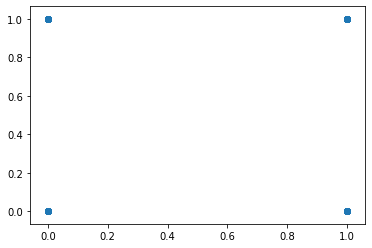

In [36]:
plt.scatter(y_test, y_test_pred);

In [37]:
import pickle 
file = open('model.pkl', 'wb') 
pickle.dump(classifier, file)

In [38]:
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glucose = int(Glucose)
    bp = int(BloodPressure)
    st = int(SkinThickness)
    insulin = int(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]
    x = sc.transform(x)

    return classifier.predict(x)

# Prediction 1
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(2, 138, 62, 35, 0, 33.6, 0.127, 47)[0]
if prediction:
    print('Oops! You have diabetes.')
else:
    print("Great! You don't have diabetes.")

Oops! You have diabetes.
